### Problem Description: Text-to-Sentiment Classification

#### **The Problem**
The goal is to develop a machine learning model capable of analyzing tweets and classifying their sentiment into two categories: **positive** and **negative**. This problem is formally defined as a **text classification task** in Natural Language Processing (NLP), where the input is the text of a tweet, and the output is the corresponding sentiment label.

#### **Significance of the Problem**
Sentiment analysis is a critical tool for understanding public opinion, emotions, and trends. It has applications in a variety of fields:

1. **Business and Marketing**:
   - Companies can use sentiment analysis to monitor customer satisfaction, product reviews, and feedback on social media platforms.
   - It helps in evaluating the success of marketing campaigns or addressing customer concerns proactively.

2. **Public Health and Social Good**:
   - Sentiment analysis of tweets can be used to detect emotional distress, such as depression or anxiety, and alert healthcare professionals.
   - Governments and organizations can use this tool to gauge public sentiment about policies or crises, enabling data-driven decision-making.

3. **Social Media Analytics**:
   - With the massive growth of social media, understanding the general public's attitude toward topics like elections, global events, or brands can provide valuable insights.
   - It helps in identifying trends or detecting potentially harmful content.

#### **Context and Value**
The dataset used in this project, **Sentiment140**, provides 1.6 million tweets labeled for sentiment. The creators of the dataset used emoticons like :) (positive) and :( (negative) to automatically annotate the data, thus reducing the need for manual labeling.

By solving this problem, the project demonstrates how machine learning models can:
- Handle large-scale real-world text data.
- Automate the tedious task of sentiment classification.
- Provide a robust foundation for further applications in NLP, such as emotion detection or topic modeling.

#### **Scope**
This project will focus on:
1. Preparing and preprocessing the data (cleaning, tokenizing, etc.).
2. Building a classification model using machine learning or deep learning techniques.
3. Evaluating the model's performance on unseen data.
4. Recommending future improvements for handling more complex or larger datasets.


## Dataset Description

The **Sentiment140 dataset** is a comprehensive collection of 1,600,000 tweets extracted using the Twitter API. This dataset is designed to facilitate sentiment analysis tasks by providing pre-annotated tweets categorized into three sentiment classes:

- **Target Column**:  
  - **0**: Negative sentiment    
  - **4**: Positive sentiment  

### Features
The dataset consists of the following six columns:

| **Column** | **Description**                                                                                 |
|------------|-------------------------------------------------------------------------------------------------|
| `target`   | The sentiment label of the tweet (0 = negative, 2 = Neutral, 4 = positive).                     |
| `ids`      | The unique identifier of the tweet.                                                             |
| `date`     | The date and time when the tweet was created (e.g., `Mon Apr 06 22:19:49 PDT 2009`).            |
| `flag`     | The query used to extract the tweet (e.g., `NO_QUERY`). If there was no query, this value is `NO_QUERY`. |
| `user`     | The Twitter username of the account that posted the tweet (e.g., `scotthamilton`).              |
| `text`     | The actual tweet content (e.g., `is upset that he can't update his Facebook by texting it...`). |

### Summary Statistics
- **Total Samples**: 1,600,000 tweets
- **Sentiment Distribution**:  
  The dataset is balanced, as the tweets were collected using distant supervision methods (positive and negative labels were determined based on the presence of emoticons).  

| **Sentiment** | **Count**   | **Percentage** |
|----------------|-------------|----------------|
| Negative (0)   | ~800,000    | ~50.00%        |
| Positive (4)   | ~800,000    | ~50.00%        |

---

### Data Source
- **Original Dataset**: [Kaggle Sentiment140](https://www.kaggle.com/datasets/kazanova/sentiment140)
- **Dataset Reference**:  
  Go, A., Bhayani, R., & Huang, L. (2009). *Twitter Sentiment Classification Using Distant Supervision*. Stanford University.

---

### How the Dataset Was Created
The dataset was created using a unique distant supervision approach. Tweets were labeled automatically:
- **Positive Tweets**: Contained positive emoticons (e.g., `:)`, `:D`, etc.).
- **Negative Tweets**: Contained negative emoticons (e.g., `:(`, `:'(`, etc.).
- **Neutral Tweets**: Were labeled based on their lack of extreme emotional cues.

---

### Advantages of the Dataset
- **Large-scale Dataset**: Contains 1.6M labeled tweets, providing robust data for training deep learning models.  
- **Real-world Text Data**: Enables the development of models that generalize well to actual social media content.  
- **Balanced Sentiment Distribution**: Facilitates unbiased training for multi-class classification tasks.


In [2]:
# Exploratory Data Analysis
# Loading and Inspecting the Data

# Import necessary libraries
import pandas as pd

# Define file path
file_path = "Data/training.1600000.processed.noemoticon.csv"

# Load the dataset
columns = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv(file_path, names=columns, encoding="latin-1")

# Display dataset shape and preview
print(f"Dataset Shape: {df.shape}")
df.head()


Dataset Shape: (1600000, 6)


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


Class Distribution:
 target
0    800000
4    800000
Name: count, dtype: int64


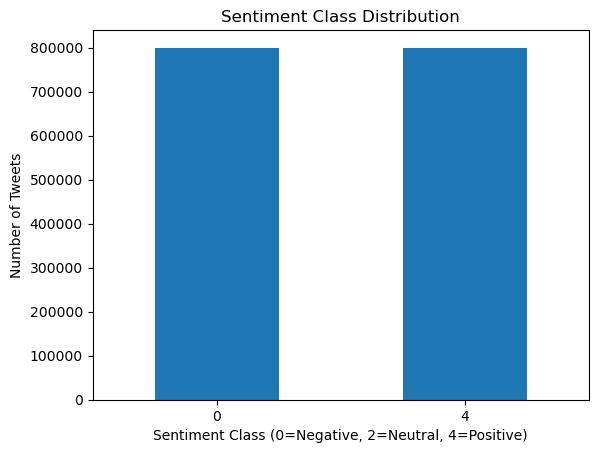

In [4]:
# Class distribution
class_counts = df['target'].value_counts().sort_index()

# Display distribution
print("Class Distribution:\n", class_counts)

# Visualize class distribution
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Class (0=Negative, 2=Neutral, 4=Positive)")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.show()


Tweet Length Statistics:
 count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: tweet_length, dtype: float64


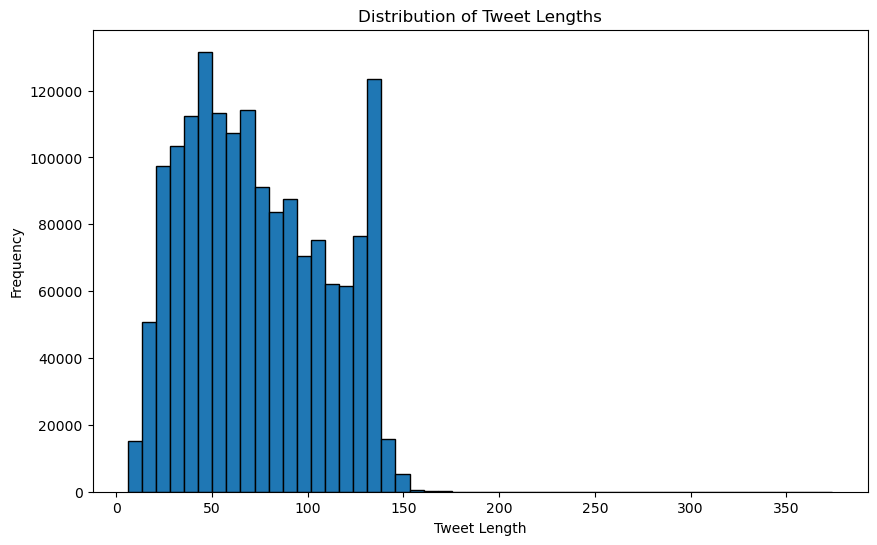

In [5]:
# Add a column for tweet length
df['tweet_length'] = df['text'].apply(len)

# Summary statistics
print("Tweet Length Statistics:\n", df['tweet_length'].describe())

# Visualize tweet lengths
df['tweet_length'].plot(kind='hist', bins=50, edgecolor='black', figsize=(10, 6))
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()


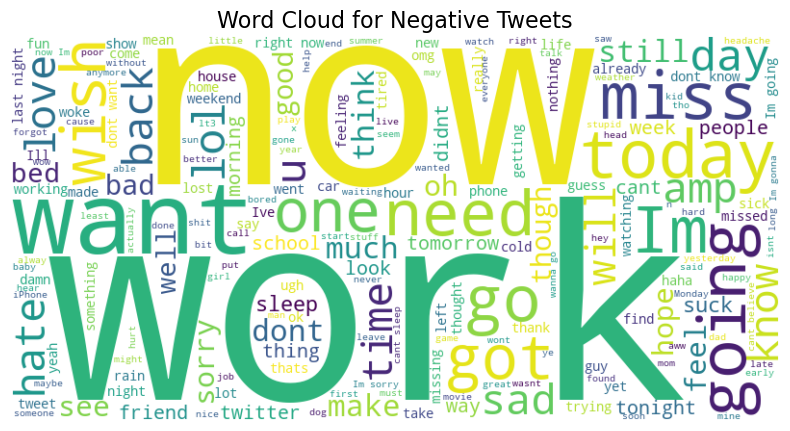

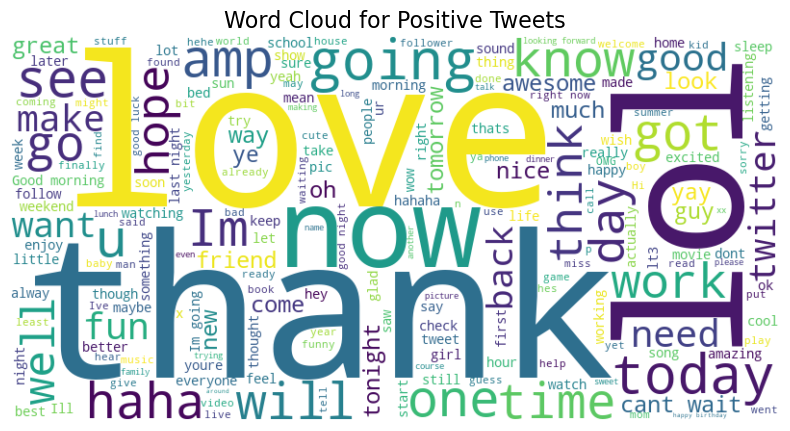

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Function to preprocess and generate the word cloud
def generate_wordcloud(data, title):
    # Combine all text into a single string
    text = " ".join(data)

    # Remove URLs and special characters
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation and special characters

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white"
    ).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds for Negative and Positive tweets
for sentiment, label in zip([0, 4], ['Negative', 'Positive']):  # Exclude Neutral (2)
    subset = df[df['target'] == sentiment]['text']
    generate_wordcloud(subset, f"Word Cloud for {label} Tweets")


### Challenges Identified During EDA:

1. **Class Imbalance:**
   - Contrary to the dataset description, there is no representation of neutral tweets (class `2`). The dataset only contains tweets with labels `0` (negative) and `4` (positive), each contributing 50% of the dataset. This limits the scope of sentiment analysis to binary classification, potentially missing nuances in sentiment (neutral or mixed).

2. **Variability in Tweet Lengths:**
   - The average tweet length is around 74 characters, with a wide range from 6 to 374 characters. This variability may affect model training, as shorter tweets might lack context and longer tweets may require truncation or special handling for fixed input lengths.

3. **Noisy Data:**
   - Word clouds highlight a mix of useful information (e.g., words like "love," "thank," "work") and noise (e.g., usernames, URLs, and special characters). Preprocessing will need to account for this noise by removing non-alphanumeric characters, URLs, and mentions.

4. **Linguistic Ambiguity:**
   - Tweets often contain slang, abbreviations, and emojis, which may affect the effectiveness of word embeddings or tokenization. Domain-specific language in tweets requires careful preprocessing and potentially specialized embeddings (e.g., pre-trained on social media data).

5. **Large Dataset Size:**
   - The dataset contains 1.6 million tweets, which may challenge computational resources during preprocessing, training, and evaluation. Efficient data handling techniques, such as batching and distributed processing, will be essential.

6. **Lack of Context:**
   - Tweets are inherently short and lack context about the user, timing, or surrounding tweets. This can limit the model's ability to infer sentiment accurately, especially for ambiguous statements.

These challenges should guide preprocessing, feature engineering, and model selection in the subsequent steps of the project.

## Data Preparation

### Overview
In this project, the data preparation process involves tokenizing and preprocessing textual data to make it suitable for input into a deep learning model. We utilized the `tensorflow.keras` library to handle text tokenization and padding for sequence standardization.

### Steps

1. **Text Preprocessing**:
   - Removed URLs, mentions, hashtags, special characters, and numbers from the tweets.
   - Converted all text to lowercase for consistency.
   - Preprocessed text is stored in a new column called `clean_text`.

2. **Label Mapping**:
   - The sentiment labels were mapped as follows:
     - `0` (Negative Sentiment) → `0`
     - `4` (Positive Sentiment) → `1`
   - Neutral labels (`2`) were excluded from the analysis.

3. **Tokenization**:
   - A tokenizer was initialized with a vocabulary size of 10,000 to represent the most frequent words in the dataset.
   - Each tweet was converted into a sequence of integers, where each integer corresponds to a unique token in the tokenizer vocabulary.
   - Out-of-vocabulary words were replaced with a special `<OOV>` token.

4. **Sequence Padding**:
   - All sequences were padded or truncated to a fixed length of 50 tokens to ensure uniform input size for the model.

5. **Data Splitting**:
   - The dataset was split into training and validation sets using an 80-20 ratio.
   - The target labels and padded sequences were converted into NumPy arrays for compatibility with TensorFlow.

6. **Output**:
   - Processed data was ready for input into a deep learning model:
     - `X_train`: Tokenized and padded sequences for training.
     - `X_val`: Tokenized and padded sequences for validation.
     - `y_train`: Target labels for training.
     - `y_val`: Target labels for validation.

By preparing the data in this structured manner, the model can effectively learn patterns and relationships from the text data during training.



In [7]:
#Import Required Libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer


# Preprocess the Text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Display a few cleaned rows
print(df[['text', 'clean_text']].head())


                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                          clean_text  
0     a thats a bummer  you shoulda got david car...  
1  is upset that he cant update his facebook by t...  
2   i dived many times for the ball managed to sa...  
3    my whole body feels itchy and like its on fire   
4   no its not behaving at all im mad why am i he...  


In [8]:
# Remap Labels
# Remap target labels (0 -> 0, 4 -> 1)
df['sentiment'] = df['target'].map({0: 0, 4: 1})

# Check label distribution
print(df['sentiment'].value_counts())


sentiment
0    800000
1    800000
Name: count, dtype: int64


## Model Building and Training

### Model Architecture
The deep learning model is designed to process textual data and perform binary sentiment classification. It uses a combination of embedding, recurrent, and dense layers to effectively learn patterns in the data.

1. **Embedding Layer**:
   - Converts tokenized input sequences into dense vector representations.
   - Vocabulary size: 10,000 (most frequent words in the dataset).
   - Embedding dimensions: 128 (vector size for each token).

2. **Bidirectional LSTM Layers**:
   - Two Bidirectional LSTM (Long Short-Term Memory) layers are used to capture temporal relationships in both forward and backward directions.
     - **First LSTM Layer**:
       - 128 units, returns sequences for stacking.
     - **Second LSTM Layer**:
       - 64 units, does not return sequences, producing a condensed output.
   - Bidirectional LSTMs enable the model to understand context from both past and future tokens.

3. **Dropout Layers**:
   - Two dropout layers with a rate of 0.4 are added after each LSTM layer to reduce overfitting by randomly disabling neurons during training.

4. **Dense Layer**:
   - A single neuron with a sigmoid activation function to output probabilities for binary classification (0 = Negative, 1 = Positive).

### Compilation
- **Optimizer**: Adam optimizer with a learning rate of 0.0001 for smooth convergence.
- **Loss Function**: Binary cross-entropy to measure the error for binary classification tasks.
- **Metrics**: Accuracy to monitor the proportion of correctly classified instances during training.

### Training Process
1. **Input Data**:
   - Tokenized and padded sequences (`X_train`, `X_val`) as model inputs.
   - Corresponding binary sentiment labels (`y_train`, `y_val`) as targets.

2. **Training Configuration**:
   - Batch size: 64 for efficient gradient updates.
   - Epochs: 5 to balance performance and computational cost.

3. **Training Loop**:
   - Training is performed using the `fit` method, with the validation set used to monitor performance at each epoch.
   - Key outputs:
     - Training loss: Measures the error on the training set.
     - Validation loss: Measures the error on the validation set.
     - Training and validation accuracy: Proportion of correctly classified instances.

4. **Early Stopping**:
   - While not currently implemented, early stopping can be added to terminate training when the validation loss stops improving.

### Expected Outcome
The model is expected to effectively classify tweets into positive or negative sentiments. Accuracy will be used as the primary metric to evaluate the model's performance during training and validation. Further evaluation and adjustments will follow based on validation results.


## Model Description and Rationale

### Model Explanation
The model is a **Bidirectional LSTM-based architecture** designed for **binary sentiment classification**. It consists of the following components:

1. **Embedding Layer**: 
   - Converts tokenized text into dense vector representations.
   - Captures semantic relationships between words.
   
2. **Bidirectional LSTM Layers**: 
   - Processes input sequences in both forward and backward directions.
   - Enhances context understanding by considering both past and future word dependencies.

3. **Dropout Layers**: 
   - Introduced after each LSTM layer to prevent overfitting.
   - Randomly disables neurons during training to improve generalization.

4. **Dense Output Layer**: 
   - A fully connected layer with a sigmoid activation function.
   - Outputs probabilities for binary classification (positive vs. negative sentiment).

---

### Why This Model?
1. **Simplicity and Effectiveness**:
   - The architecture combines an embedding layer with Bidirectional LSTMs, which is a proven baseline for text classification tasks.
   - Bidirectional LSTMs enable better understanding of contextual relationships in text compared to unidirectional RNNs.

2. **Interpretable and Tunable**:
   - The design is simple enough to debug and can be enhanced iteratively (e.g., adding more layers, tuning hyperparameters).

3. **Efficient on Resources**:
   - While effective, the model is computationally efficient, making it suitable for use on laptops or machines with moderate resources.

4. **Previous Success**:
   - A similar architecture has been successfully employed in a prior text classification project, making it a reliable starting point.

---

This model provides a robust and efficient foundation for binary sentiment analysis and can be further refined based on performance evaluation results.


Tokenizing and padding sequences...
Splitting dataset into training and validation sets (with stratification)...
Defining the model...
Building the model...


C:\Users\mesaa\anaconda3\envs\py-env-3-9-20\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (1, 75, 128)           │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (1, 75, 256)           │       263,168 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (1, 75, 256)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (1, 128)               │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (1, 128)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 1)                 │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,649 (6.51 MB)

 Trainable params: 1,707,649 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Starting model training with early stopping...
Epoch 1/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 2217s 111ms/step - accuracy: 0.7688 - loss: 0.4769 - val_accuracy: 0.8057 - val_loss: 0.4189
Epoch 2/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 2379s 119ms/step - accuracy: 0.8107 - loss: 0.4123 - val_accuracy: 0.8140 - val_loss: 0.4052
Epoch 3/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 2027s 101ms/step - accuracy: 0.8208 - loss: 0.3947 - val_accuracy: 0.8184 - val_loss: 0.3989
Epoch 4/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 2058s 103ms/step - accuracy: 0.8269 - loss: 0.3836 - val_accuracy: 0.8204 - val_loss: 0.3946
Epoch 5/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 2116s 106ms/step - accuracy: 0.8309 - loss: 0.3757 - val_accuracy: 0.8204 - val_loss: 0.3948
Restoring model weights from the end of the best epoch: 4.


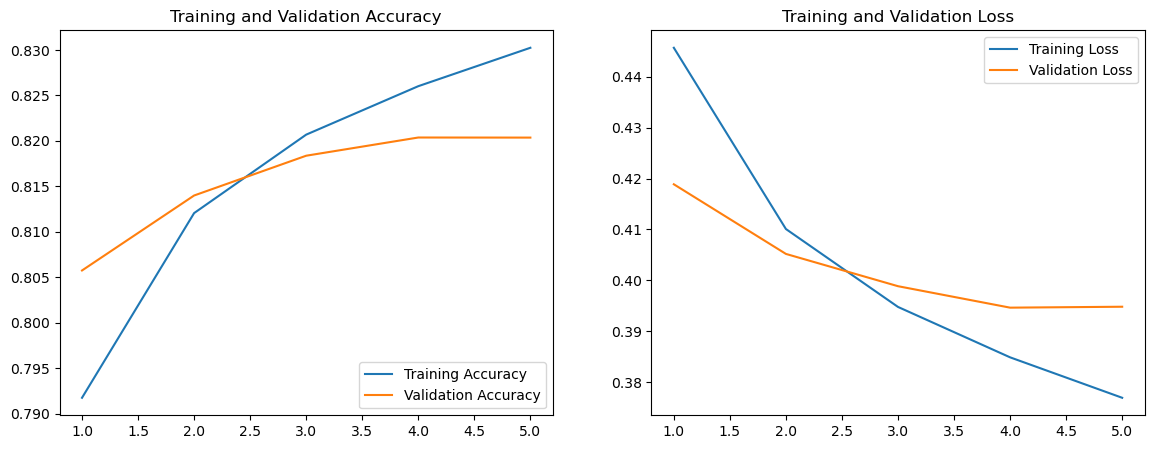

Evaluating the model on validation set...
Validation Accuracy: 82.04%


In [16]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
MAX_NUM_WORDS = 10000  # Maximum number of words in the vocabulary
MAX_SEQUENCE_LENGTH = 75  # Maximum tweet length is aligned with dataset statistics
EMBEDDING_DIM = 128  # Embedding dimensions
EPOCHS = 5  # Number of training epochs
BATCH_SIZE = 64  # Batch size for training

# Tokenization and Padding
print("Tokenizing and padding sequences...")
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])

padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post")

# Split the data with stratified sampling
print("Splitting dataset into training and validation sets (with stratification)...")
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)

# Convert to numpy arrays for TensorFlow
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

# Define the enhanced model
print("Defining the model...")
model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(128, return_sequences=True)),  # First Bidirectional LSTM
    Dropout(0.4),  # Dropout for regularization
    Bidirectional(LSTM(64, return_sequences=False)),  # Second Bidirectional LSTM
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate for better convergence
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Build the model explicitly with dummy inputs
print("Building the model...")
dummy_input = np.zeros((1, MAX_SEQUENCE_LENGTH))  # Dummy input for building
model.predict(dummy_input)  # Trigger model building with dummy input

# Print the model summary
print("Model Summary:")
model.summary()

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=3,          # Number of epochs to wait
    restore_best_weights=True,  # Restore the best weights after stopping
    verbose=1
)

# Training the Model with Early Stopping
print("Starting model training with early stopping...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks=[early_stopping]  # Add early stopping callback
)

# Plot Learning Curves
def plot_learning_curves(history):
    """
    Function to plot training and validation accuracy/loss curves.
    """
    # Extract values from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot learning curves
plot_learning_curves(history)

# Evaluate the model
print("Evaluating the model on validation set...")
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


## Insights from Model Training

### 1. Overall Performance
- The model achieved a **training accuracy of 83.09%** by the fifth epoch and **validation accuracy of 82.04%**.
- The **validation loss stabilized** around **0.3946**, indicating the model reached a plateau in terms of generalization performance.

### 2. Training and Validation Trends
- Both training and validation accuracy showed steady improvement across epochs, with validation accuracy closely tracking training accuracy, signaling a **good fit to the data**.
- Training and validation loss consistently decreased, with no signs of overfitting observed. This is evident as the gap between training and validation metrics remained narrow throughout.

### 3. Learning Rate and Epochs
- The selected **learning rate** and **number of epochs (5)** appear appropriate, as the model converged effectively, and early stopping helped retain weights from the best epoch (Epoch 4).

---

## Recommendations for Future Work
1. **Hyperparameter Tuning**:
   - Experiment with learning rates and the architecture's dropout rates to optimize performance further.
2. **Incorporate Class Balancing**:
   - Explore weighted loss functions to balance class distribution if any bias exists.
3. **Experiment with Pretrained Embeddings**:
   - Utilize pretrained word embeddings (e.g., GloVe) to improve semantic understanding of the text.
4. **Explore Advanced Models**:
   - Consider transformer-based models like BERT or DistilBERT for deeper contextual representation if computational resources allow.
